In [ ]:
!pip install dtaidistance
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json

import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import json
from sklearn.model_selection import train_test_split
from os import listdir,mkdir
from os.path import isfile, join,exists
import seaborn as sns
from keras import Model
from keras.utils import np_utils
from keras.layers import Input, Dense, Bidirectional,Dropout,BatchNormalization
from keras.layers import LSTM
from tensorflow.keras import Sequential
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=100
drive_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data'
local_path='/Users/vikashmediboina/Documents/Exersises'
angle_rep_wise_data_path='angle_rep_wise_data_40_vedioes_each_set.xlsx'
postion_rep_wise_data_path='postion_rep_wise_data_40_vedioes_each_set.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='postion_data_frame_size_100.xlsx'
test_postion_rep_wise_data_path='test_postion_rep_wise_data.xlsx'
test_angle_rep_wise_data_path='test_angle_rep_wise_data.xlsx'
test_postion_data_path='test_postion_data_all.xlsx'
test_angle_data_path='test_angle_data_all.xlsx'
postion_without_mean_frame_size='postion_without_mean_frame_size_100.xlsx'
angle_without_mean_frame_size='angle_without_mean_frame_size_100.xlsx'
test_postion_without_mean_frame_size='test_postion_without_mean_frame_size_100.xlsx'
test_angle_without_mean_frame_size='test_angle_without_mean_frame_size_100.xlsx'
postion_feauters=28
angle_feauters=8


LSTM

In [ ]:
def define_model(feauters):
    model = Sequential()
    model.add(LSTM(feauters, input_shape=(frame_size,feauters), return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
   # model.add(LSTM(32, return_sequences=True))
   # model.add(Dropout(0.1))
   # model.add(BatchNormalization())
    
  #  model.add(LSTM(32))
   # model.add(Dropout(0.1))
   # model.add(BatchNormalization())
    
    
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    
    
    model.add(Dense(10, activation='softmax'))
  

    # input1 = Input(shape=(frame_size,28)) #take the reshape last two values, see "data = np.reshape(data,(10,2,1))" which is "data/batch-size, row, column"
    # print("01")
    # lstm1 = Bidirectional(LSTM(units=128,return_sequences=True))(input1)#,return_sequences=True
    # print("02")
    # dropout1=Dense(Dropout(0.2))(lstm1)
    # print("03")
    # normlaze1=Dense(BatchNormalization())(dropout1)
    # print("1")

    # lstm2 = Bidirectional(LSTM(units=128,return_sequences=True))(normlaze1)#,return_sequences=True
    # dropout2=Dense(Dropout(0.1))(lstm2)
    # normlaze2=Dense(BatchNormalization())(dropout2)
    # print("2")
    # lstm3 = Bidirectional(LSTM(units=128))(normlaze2)#,return_sequences=True
    # dropout3=Dense(Dropout(0.1))(lstm3)
    # normlaze3=Dense(BatchNormalization())(dropout3)
    # print("3")
    # dnn_hidden_layer1 = Dense(32, activation='relu')(normlaze3)
    # dropout4=Dense(Dropout(0.2))(dnn_hidden_layer1)
    # # lstm2 = Bidirectional(LSTM(units=32,input_shape=(frame_size,28)))(lstm1)
    # # dnn_hidden_layer2 = Dense(32, activation='relu')(lstm2)
    # dnn_output = Dense(10, activation='softmax')(dropout4)
    # model = Model(inputs=[input1],outputs=[dnn_output])
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

BI DICRTIONAL LSTM

In [ ]:
def define_model_bi_directional(feauters):
    model = Sequential()
    model.add(Bidirectional(LSTM(feauters, input_shape=(frame_size,feauters), return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    
    
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.build((None,frame_size,feauters))
    model.summary()
    return model

FUNCTION AFTER PREDICTION

In [ ]:
from keras.backend import argmax
def after_traing(y_test,prediction):
  
  print("testig accuracy===>",balanced_accuracy_score(y_test, prediction))
  cf_matrix = confusion_matrix(y_test, prediction)
  plt.figure(figsize=(20,15))
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")
  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category ');
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

        ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
# right_knee_Y,right_hip_Y.  right_knee_X,right_hip_X

def get_data_after_normalising(pd_frame):
  # df_group = pd_frame.drop(['rep_id','label','Unnamed: 0'],axis=1).groupby( ["vedio_id"])
  pd_df=pd_frame
 
  # for index, group in df_group:
  #       for key in group.keys():
  #         if(key!="vedio_id" or key!="distance"):
  #             pd_df[key][pd_df.index.isin(group.index)]=group[key]-group[key].mean()
  #       # print(group['distance'].mean())

  df_group = pd_df.groupby( ["vedio_id"])
  for index, group in df_group:
        for key in group.keys():
          if(key!='vedio_id' or key!="distance"):
            pd_df[key][pd_df.index.isin(group.index)].div(group['distance'].mean())
  return pd_df

POSTION DATA AND ANGLE DATA READING FOR TRAIN

In [ ]:
pd_position_data=pd.read_excel(join(drive_path,postion_without_mean_frame_size))
pd_angle_data=pd.read_excel(join(drive_path,angle_without_mean_frame_size))

##POSTION PREPROSESSING

In [ ]:
pd_position_data_after_mean=pd_position_data

dist=np.sqrt((pd_position_data['right_knee_Y'] - pd_position_data['right_hip_Y'])**2 + (pd_position_data['right_knee_X'] - pd_position_data['right_hip_X'])**2)
pd_position_data_after_mean=pd_position_data.drop(['label','rep_id','Unnamed: 0'],axis=1).subtract(pd_position_data.drop(['label','rep_id','Unnamed: 0'],axis=1).groupby( ["vedio_id"]).expanding(1).mean().reset_index()).drop(["level_1"],axis=1)
pd_position_data_after_mean['distance']=dist
pd_position_data_after_mean=get_data_after_normalising(pd_position_data_after_mean)
pd_position_data_after_mean['label']=pd_position_data['label']
pd_position_data_after_mean['rep_id']=pd_position_data['rep_id']
pd_position_data_after_mean['vedio_id']=pd_position_data['vedio_id']
pd_position_data_after_mean

,left_ankle_X,left_ankle_Y,left_elbow_X,left_elbow_Y,left_eye_smplhf_X,left_eye_smplhf_Y,left_hip_X,left_hip_Y,left_knee_X,left_knee_Y,...,right_knee_X,right_knee_Y,right_shoulder_X,right_shoulder_Y,right_wrist_X,right_wrist_Y,vedio_id,distance,label,rep_id
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,26.019224,armraise,1
1,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1,26.019224,armraise,1
2,0.000000,0.000000,1.666667,-0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.333333,-0.666667,1,26.019224,armraise,1
3,0.000000,0.000000,4.250000,-2.000000,-0.750000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.250000,-3.500000,1,26.019224,armraise,1
4,0.000000,0.000000,6.600000,-4.800000,-0.600000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.800000,9.800000,-10.000000,1,26.019224,armraise,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237795,-1.027027,3.452703,0.520270,1.587838,-0.864865,2.763514,0.0,0.060811,-0.918919,0.148649,...,1.875000,1.263514,-0.347973,0.986486,-0.891892,5.189189,1000,8.062258,superman,6203
237796,-1.023569,3.441077,0.518519,2.579125,-0.861953,2.754209,0.0,0.060606,-0.915825,0.148148,...,1.868687,2.255892,-0.346801,1.979798,-0.888889,5.171717,1000,8.000000,superman,6203
237797,-1.020134,3.429530,0.516779,2.570470,-0.859060,2.744966,0.0,0.060403,-0.912752,0.147651,...,1.862416,2.248322,-0.345638,1.973154,-0.885906,6.151007,1000,8.000000,superman,6203
237798,-1.016722,3.418060,0.515050,2.561873,-0.856187,2.735786,0.0,0.060201,-0.909699,0.147157,...,1.856187,2.240803,-0.344482,1.966555,-0.882943,6.130435,1000,8.000000,superman,6203


ANGLE PREPROSSEING

In [ ]:
pd_angle_data_after_mean=pd_angle_data

pd_angle_data_after_mean=pd_angle_data.drop(['label','rep_id','Unnamed: 0'],axis=1).subtract(pd_angle_data.drop(['label','rep_id','Unnamed: 0'],axis=1).groupby( ["vedio_id"]).expanding(1).mean().reset_index()).drop(["level_1"],axis=1)
pd_angle_data_after_mean['label']=pd_angle_data['label']
pd_angle_data_after_mean['rep_id']=pd_angle_data['rep_id']
pd_angle_data_after_mean['vedio_id']=pd_angle_data['vedio_id']
pd_angle_data_after_mean

,angle_left_hand_elbow,angle_left_hand_shoulder,angle_left_hip,angle_left_knee,angle_right_hand_elbow,angle_right_hand_shoulder,angle_right_hip,angle_right_knee,vedio_id,label,rep_id
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1,armraise,1
1,-1.470050,-1.470050,0.000000e+00,0.000000e+00,1.708294,0.000000,0.000000,0.000000e+00,1,armraise,1
2,-0.486224,-5.631779,2.842171e-14,2.842171e-14,-0.025028,-3.375745,0.000000,2.842171e-14,1,armraise,1
3,-1.306950,-14.364697,0.000000e+00,0.000000e+00,7.312506,-6.736433,0.000000,0.000000e+00,1,armraise,1
4,3.761645,-22.756080,-1.083606e-01,0.000000e+00,12.968655,-14.777117,0.190720,0.000000e+00,1,armraise,1
...,...,...,...,...,...,...,...,...,...,...,...
237895,6.348287,-2.461283,-7.372844e+00,-1.676977e+01,27.773903,-3.145009,-19.141033,6.809626e-01,1000,superman,6203
237896,7.815846,-0.949005,-7.335418e+00,-2.106102e+01,38.885440,-3.129045,-19.043870,6.775060e-01,1000,superman,6203
237897,7.776372,5.140405,-1.679928e+01,-2.609086e+01,38.689049,-0.518214,-25.919206,2.594921e+00,1000,superman,6203
237898,8.950045,6.327324,-1.671486e+01,-3.137274e+01,46.583879,-0.515610,-25.788959,-2.843340e+00,1000,superman,6203


FUNCTION TO FETCH X AND Y

In [ ]:
def fetch_x_y(pd_data,feauters,frame_size=100):
  x=pd_data.drop(['label'],axis=1)
  y=pd_data[pd_data.index%frame_size==0]['label']
  # print(y.shape)
  encoder = LabelEncoder()
  encoder.fit(y)
  encoded_Y = encoder.transform(y)
  dummy_y = np_utils.to_categorical(encoded_Y)
  # print(x.keys())
  x=x.to_numpy().reshape(x.size//(frame_size*feauters),frame_size,feauters)
  return x,dummy_y

POSTION DATA TRAIN AND TEST DATA

In [ ]:
x_train_postion,y_train_postion=fetch_x_y(pd_position_data_after_mean.drop(['rep_id','vedio_id','distance'],axis=1),postion_feauters,frame_size=100)
# x_test_postion,y_test_postion=fetch_x_y(test_pd_position_data_after_mean.drop(['rep_id','vedio_id','distance'],axis=1),postion_feauters,frame_size=100)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split( x_train_postion,y_train_postion, test_size=0.2, random_state=15)


SINGLE DIRECTION MODEL TRAINING

In [ ]:
model = define_model(postion_feauters)
# fit the model
model.fit(X_train,y_train,epochs=200,batch_size=500,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28)                6384      
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 batch_normalization (BatchN  (None, 28)               112       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 16)                464       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                        

Prediction

Validation

15/15 [==============================] - 1s 11ms/step
testig accuracy===> 1.0


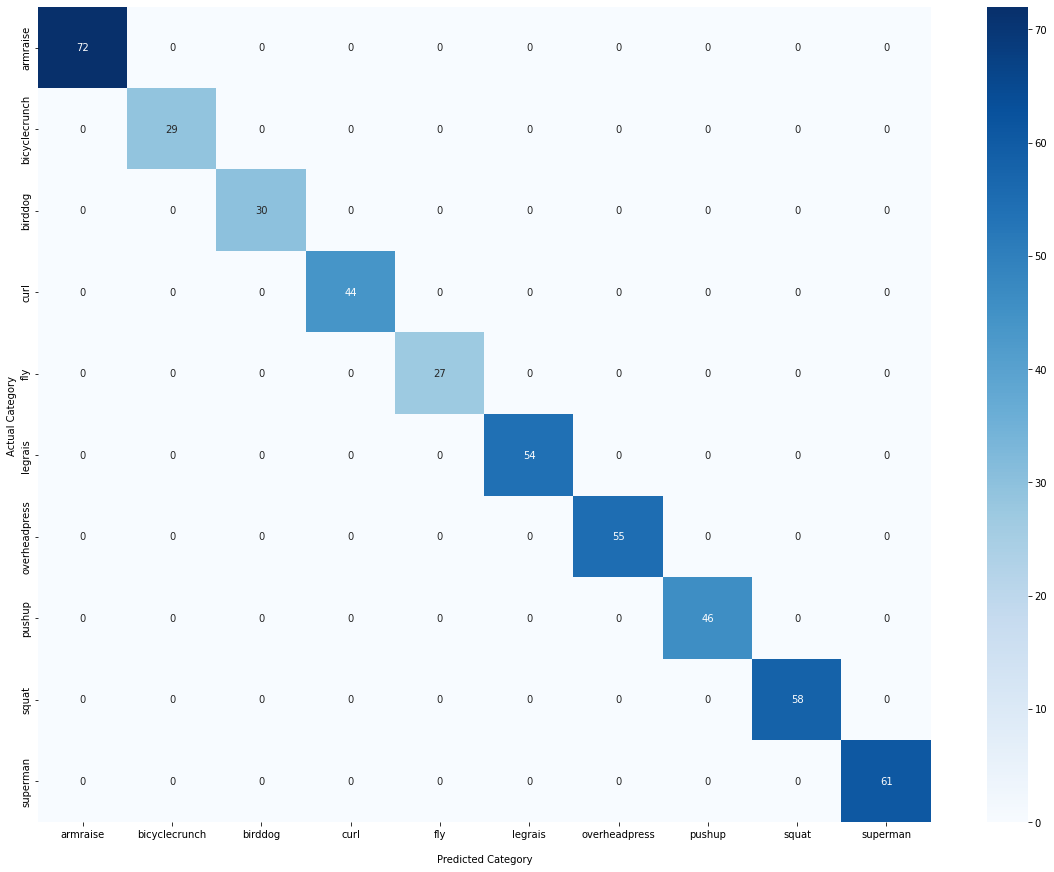

In [ ]:
Y_pred_val = model.predict(X_val)
after_traing(np.argmax(y_val,axis=1),np.argmax(Y_pred_val,axis=1))

##Bidirectional LSTM

In [ ]:
model_bi = define_model_bi_directional(postion_feauters)
# fit the model
model_bi.fit(X_train,y_train,epochs=200,batch_size=500,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 56)               12768     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 56)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 56)               224       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                912       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

###Validation

15/15 [==============================] - 1s 18ms/step
testig accuracy===> 1.0


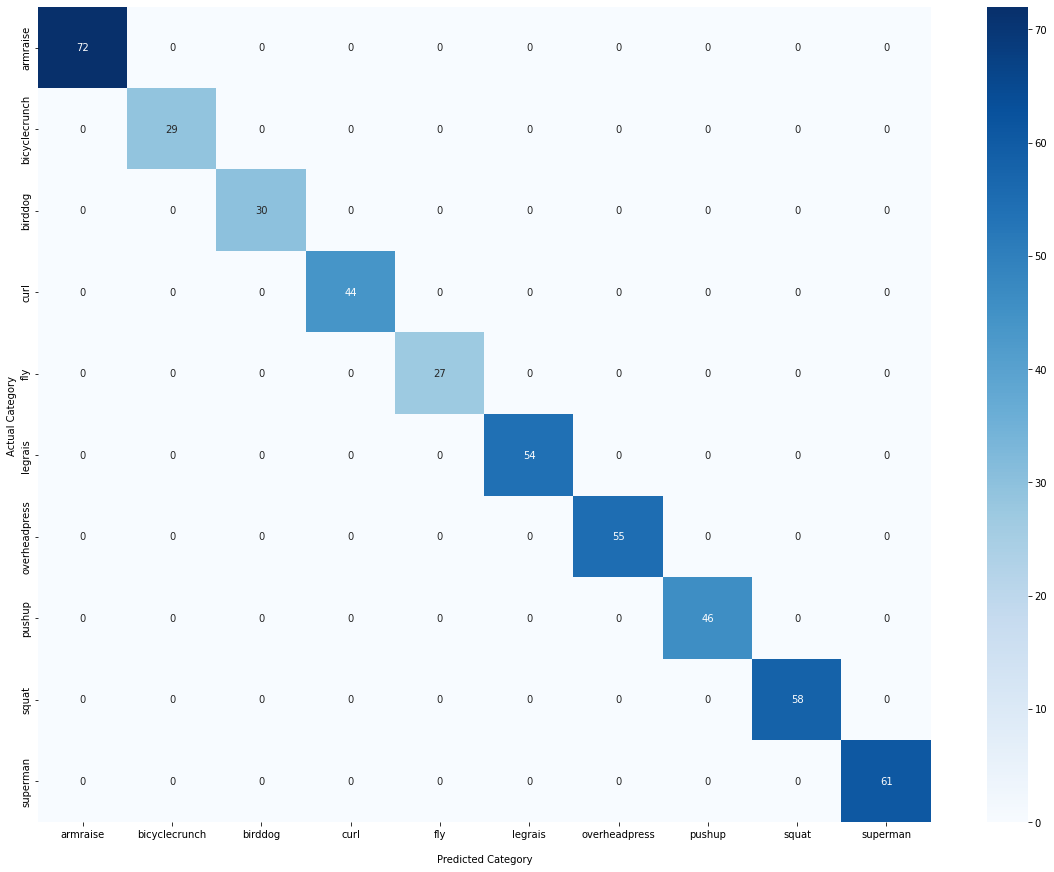

In [ ]:
Y_pred_val_bi = model_bi.predict(X_val)
after_traing(np.argmax(y_val,axis=1),np.argmax(Y_pred_val_bi,axis=1))

#ANGLE TRAING

ANGLE DATA TRAIN AND TEST SPLIT


In [ ]:
x_train_angle,y_train_angle=fetch_x_y(pd_angle_data_after_mean.drop(['rep_id','vedio_id'],axis=1),angle_feauters,frame_size=100)


In [ ]:
X_train_modal_angle, X_val_angle, y_train_model_angle, y_val_angle = train_test_split( x_train_angle,y_train_angle, test_size=0.2, random_state=15)


###SINGLE DIRECTION MODEL TRAINING

In [ ]:
model_angle = define_model(angle_feauters)
# fit the model
model_angle.fit(X_train_modal_angle,y_train_model_angle,epochs=500,batch_size=500,verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                      

###Validation
    

15/15 [==============================] - 1s 10ms/step
testig accuracy===> 0.610870833657119


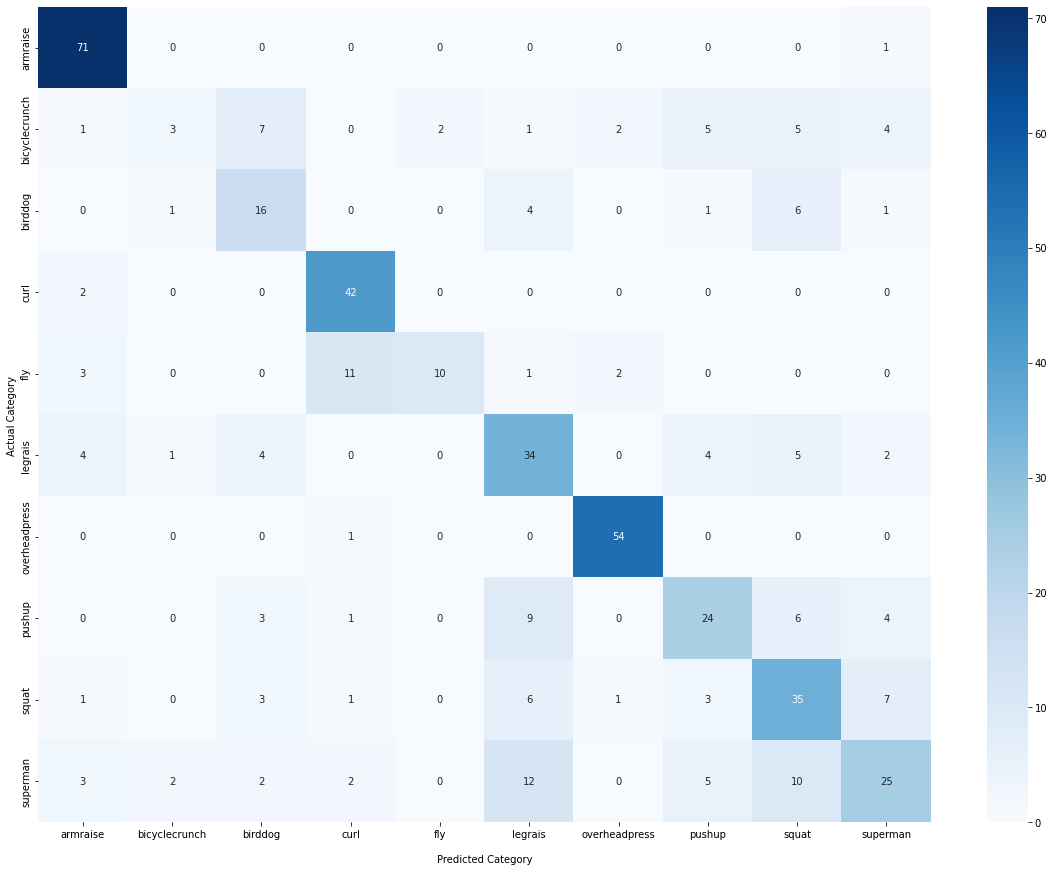

In [ ]:
Y_pred_val_angle = model_angle.predict(X_val_angle)
after_traing(np.argmax(y_val_angle,axis=1),np.argmax(Y_pred_val_angle,axis=1))

##Bidirectional LSTM

###BIDIRECTIONAL TRAINING

In [ ]:
model_bidirection_angle = define_model_bi_directional(angle_feauters)
# fit the model
model_bidirection_angle.fit(X_train_modal_angle,y_train_model_angle,epochs=500,batch_size=500,verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 16)               1088      
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 batch_normalization_8 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 10)               

15/15 [==============================] - 2s 12ms/step
testig accuracy===> 0.5229939806281502


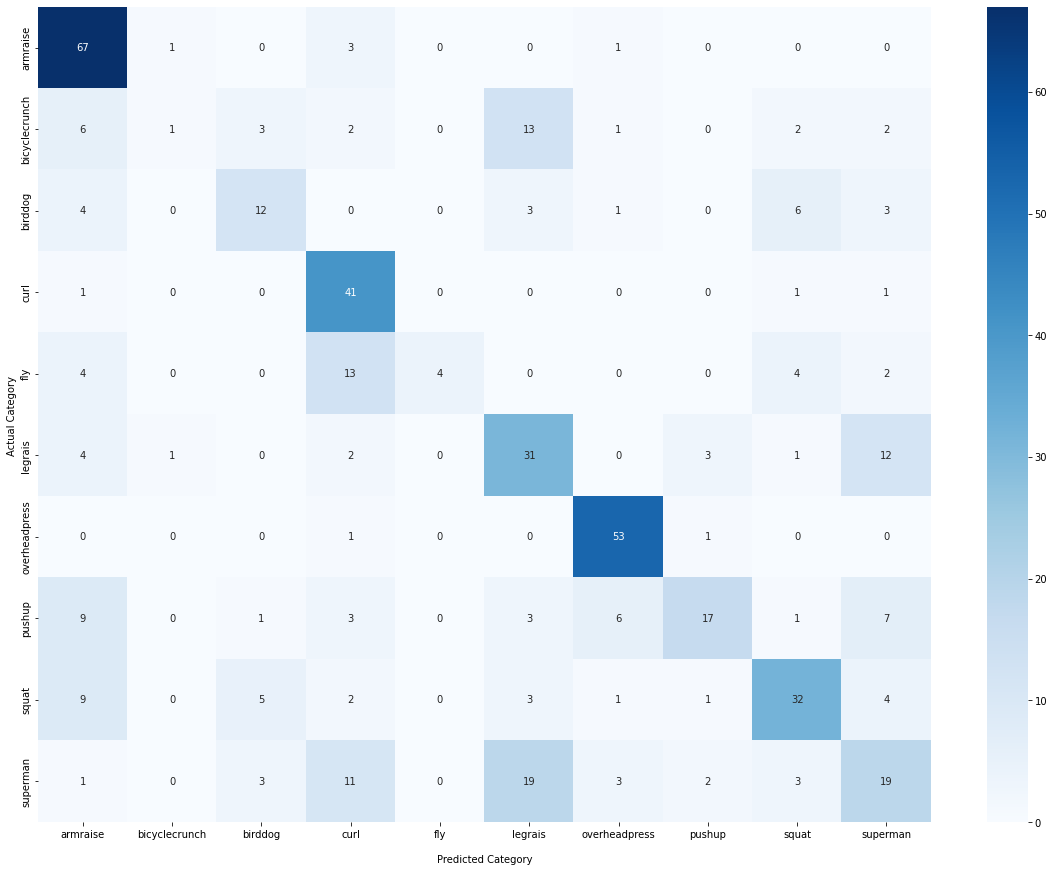

In [ ]:
Y_pred_val_angle_bi = model_bidirection_angle.predict(X_val_angle)
after_traing(np.argmax(y_val_angle,axis=1),np.argmax(Y_pred_val_angle_bi,axis=1))

#COMBINING ABGLE AND POSTION

In [ ]:
pd_grouped_Data=pd.concat([pd_angle_data_after_mean, pd_position_data_after_mean.drop(['vedio_id','distance','label','rep_id'],axis=1)], axis=1, join="inner")

In [ ]:
x_grouped,y_grouped=fetch_x_y(pd_grouped_Data.drop(['rep_id','vedio_id'],axis=1),angle_feauters+postion_feauters,frame_size=100)

In [ ]:
X_train_grouped, X_val_grouped, y_train_grouped, y_val_grouped = train_test_split( x_grouped,y_grouped, test_size=0.2, random_state=15)


In [ ]:
model_grouped = define_model(angle_feauters+postion_feauters)
# fit the model
model_grouped.fit(X_train_grouped,y_train_grouped,epochs=500,batch_size=500,verbose=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 36)                10512     
                                                                 
 dropout_20 (Dropout)        (None, 36)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 36)               144       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 16)                592       
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                     

15/15 [==============================] - 1s 14ms/step
testig accuracy===> 0.8813729512006592


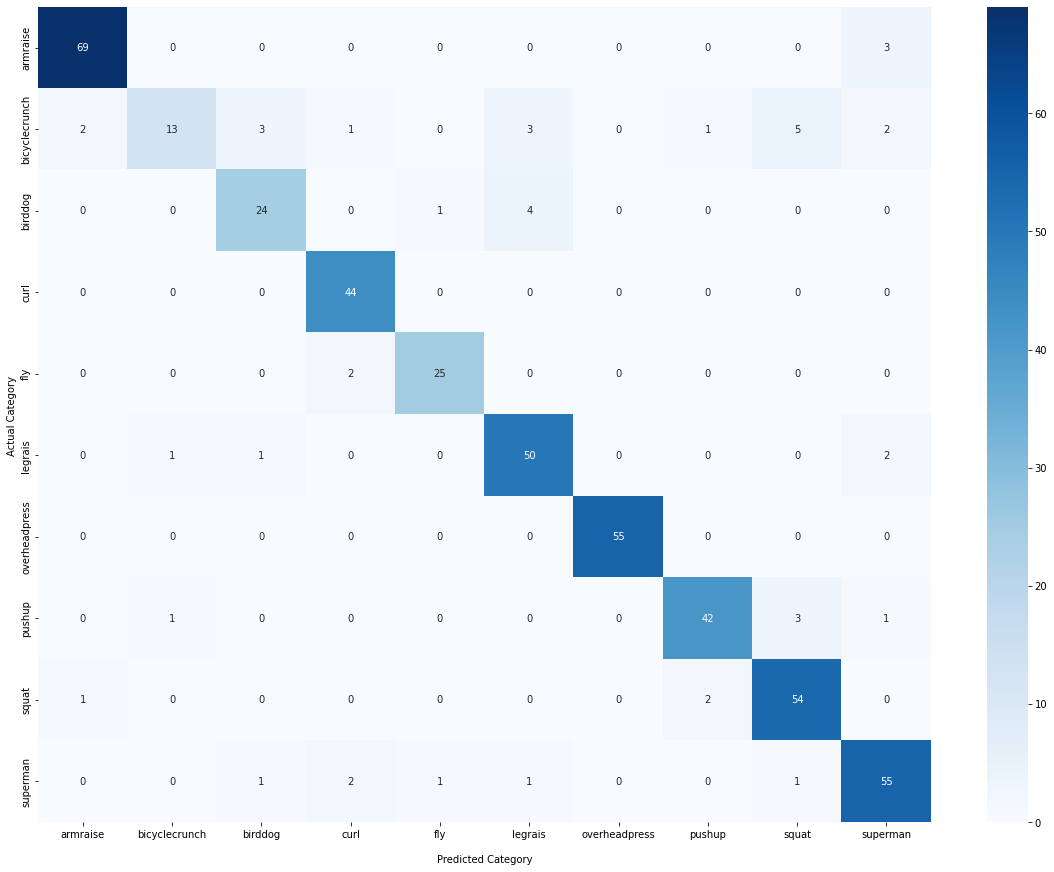

In [ ]:
Y_pred_val_grouped = model_grouped.predict(X_val_grouped)
after_traing(np.argmax(y_val_grouped,axis=1),np.argmax(Y_pred_val_grouped,axis=1))

In [ ]:
model_bidirection_grouped = define_model_bi_directional(angle_feauters+postion_feauters)
# fit the model
model_bidirection_grouped.fit(X_train_grouped,y_train_grouped,epochs=500,batch_size=500,verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 72)               21024     
 nal)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 72)                0         
                                                                 
 batch_normalization_11 (Bat  (None, 72)               288       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 16)                1168      
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 10)              

15/15 [==============================] - 1s 19ms/step
testig accuracy===> 0.9426103729690544


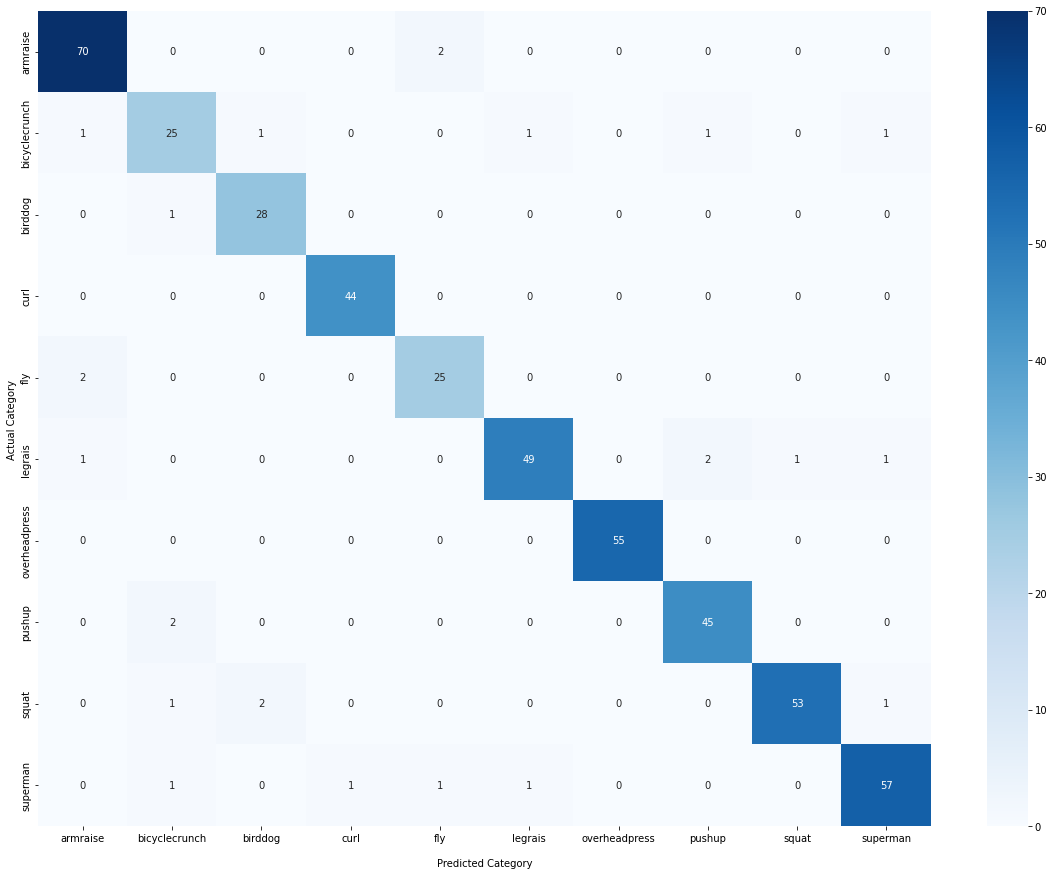

In [ ]:
Y_pred_val_grouped = model_bidirection_grouped.predict(X_val_grouped)
after_traing(np.argmax(y_val_grouped,axis=1),np.argmax(Y_pred_val_grouped,axis=1))

Testing


In [ ]:

for name,group in test_pd_position_data_after_mean.groupby('vedio_id'):
  x_test_postion,y_test_postion=fetch_x_y(group.drop(['rep_id','vedio_id','distance'],axis=1),postion_feauters,frame_size=100)
  # print(group['label'])
  pred = model.predict(x_test_postion)
  after_traing(np.argmax(y_test_postion,axis=1),np.argmax(pred,axis=1))
  # print("predicted sigmoid output => ",pred)


In [ ]:
pred = model.predict(x_test_postion)
after_traing(np.argmax(y_test_postion,axis=1),np.argmax(pred,axis=1))

After Prediction

In [ ]:
after_traing(np.argmax(y_test_postion,axis=1),np.argmax(pred,axis=1))
np.argmax(pred,axis=1),np.argmax(y_test_postion,axis=1)


In [ ]:
x.shape

In [ ]:

model = define_model(feauters)
# fit the model
model.fit(x,np.array(dummy_y),epochs=500,batch_size=500,verbose=1)
# Take a test data to test the working of the model


In [ ]:
288*15*15

In [ ]:
model.save('gdrive/MyDrive/EECE_5644_FINAL_PROJECT/Models/lstm_model_'++'.h5')

In [ ]:
cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(pred,axis=1))
plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='RdGy',fmt="d")

ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
plt.show()
metrics.accuracy_score(np.argmax(y_test,axis=1), np.argmax(pred,axis=1))